# Chapter3: Image restoration

In [ ]:
# Import the modules from skimage
from skimage import data, color
import matplotlib as plt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from skimage.filters import threshold_otsu
from skimage.color import rgb2gray
from skimage.filters import try_all_threshold
from skimage.filters import sobel
from skimage.filters import gaussian
from skimage import exposure
from skimage.transform import rotate, rescale
from skimage.transform import resize
from skimage import morphology

def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()



In [ ]:
def get_mask(image):
  ''' Creates mask with three defect regions '''
  mask = np.zeros(image.shape[:-1])
  mask[101:106, 0:240] = 1
  mask[152:154, 0:60] = 1
  mask[153:155, 60:100] = 1
  mask[154:156, 100:120] = 1
  mask[155:156, 120:140] = 1
  mask[212:217, 0:150] = 1
  mask[217:222, 150:256] = 1
  return mask


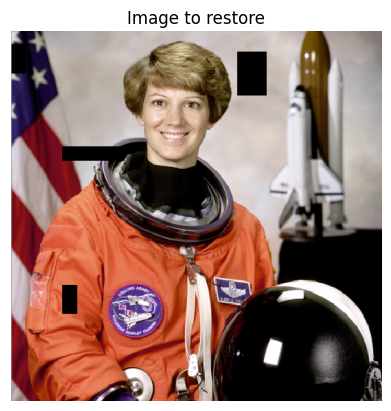

<ipython-input-4-669b6ccbebe8>:12: FutureWarning: `multichannel` is a deprecated argument name for `inpaint_biharmonic`. It will be removed in version 1.0. Please use `channel_axis` instead.
  restored_image = inpaint.inpaint_biharmonic(defect_image, mask, multichannel=True)


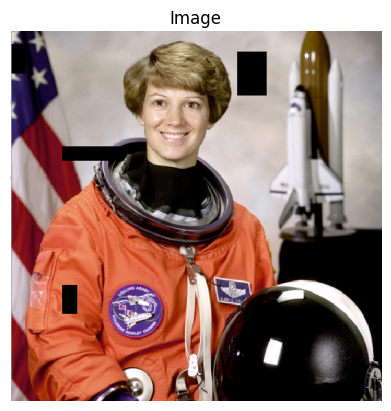

In [ ]:

# Import the module from restoration
from skimage.restoration import inpaint

defect_image = plt.imread("damaged_astronaut.png")

mask = get_mask(defect_image)

# Show the defective image
show_image(defect_image, 'Image to restore')

# Apply the restoration function to the image using the mask
restored_image = inpaint.inpaint_biharmonic(defect_image, mask, multichannel=True)
show_image(restored_image)

# 2. xóa ảnh chứa logo bằng thuật toán biharmonic

<ipython-input-5-ad8b676fff2c>:28: FutureWarning: `multichannel` is a deprecated argument name for `inpaint_biharmonic`. It will be removed in version 1.0. Please use `channel_axis` instead.
  image_logo_removed = inpaint.inpaint_biharmonic(image_with_logo, mask, multichannel=True)


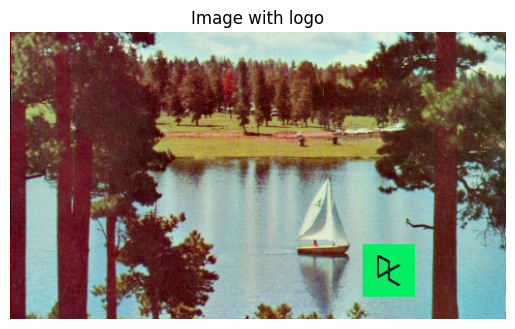

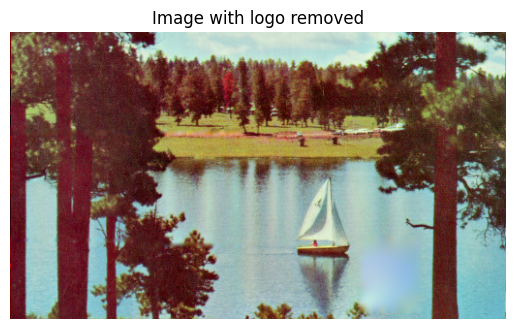

In [ ]:
from skimage.restoration import inpaint
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

image_with_logo = plt.imread("lake.png")

# Define the function to get the mask
def get_mask(image):
    ''' Creates mask with three defect regions '''
    mask = np.zeros(image.shape[:-1])
    mask[101:106, 0:240] = 1
    mask[152:154, 0:60] = 1
    mask[153:155, 60:100] = 1
    mask[154:156, 100:120] = 1
    mask[155:156, 120:140] = 1
    mask[212:217, 0:150] = 1
    mask[217:222, 150:256] = 1
    return mask

# Ensure the mask has the same shape as the image
mask = get_mask(image_with_logo)

# Set the pixels where the logo is to 1
mask[210:290, 360:425] = 1

# Apply inpainting to remove the logo
image_logo_removed = inpaint.inpaint_biharmonic(image_with_logo, mask, multichannel=True)

# Show the original and logo removed images
show_image(image_with_logo, 'Image with logo')
show_image(image_logo_removed, 'Image with logo removed')


code tối ưu hơn

<ipython-input-13-9eee20f84be7>:8: FutureWarning: `multichannel` is a deprecated argument name for `inpaint_biharmonic`. It will be removed in version 1.0. Please use `channel_axis` instead.
  image_logo_removed = inpaint.inpaint_biharmonic(image_with_logo,


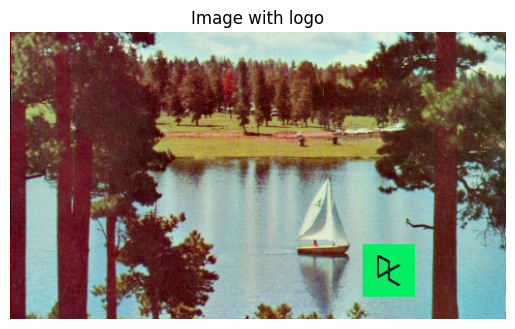

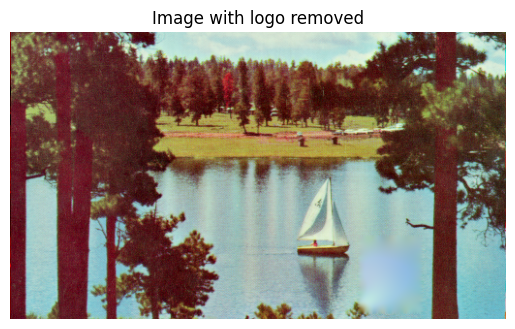

In [ ]:
# Initialize the mask
mask = np.zeros(image_with_logo.shape[:-1])

# Set the pixels where the logo is to 1
mask[210:290, 360:425] = 1

# Apply inpainting to remove the logo
image_logo_removed = inpaint.inpaint_biharmonic(image_with_logo,
                                                mask,
                                                multichannel=True)

# Show the original and logo removed images
show_image(image_with_logo, 'Image with logo')
show_image(image_logo_removed, 'Image with logo removed')

# **3. Noise**
1. Let's make some noise!

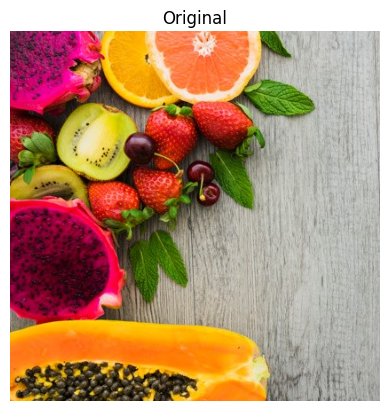

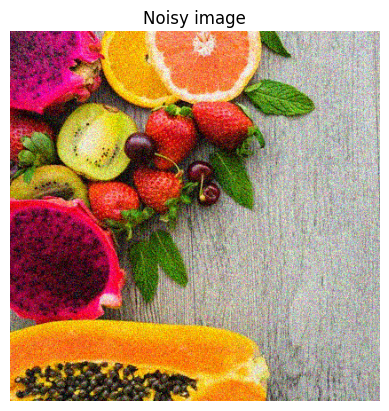

In [ ]:
# Import the module and function
from skimage.util import random_noise

fruit_image = plt.imread("fruits_square.jpg")

# Add noise to the image
noisy_image = random_noise(fruit_image)

# Show original and resulting image
show_image(fruit_image, 'Original')
show_image(noisy_image, 'Noisy image')

<ipython-input-7-ee9d3ca99c3f>:7: FutureWarning: `multichannel` is a deprecated argument name for `denoise_tv_chambolle`. It will be removed in version 1.0. Please use `channel_axis` instead.
  denoised_image = denoise_tv_chambolle(noisy_image, multichannel=True)


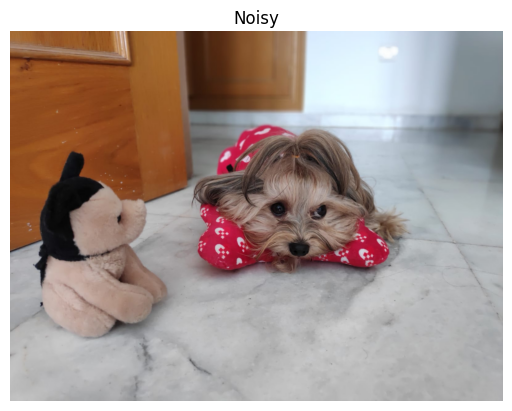

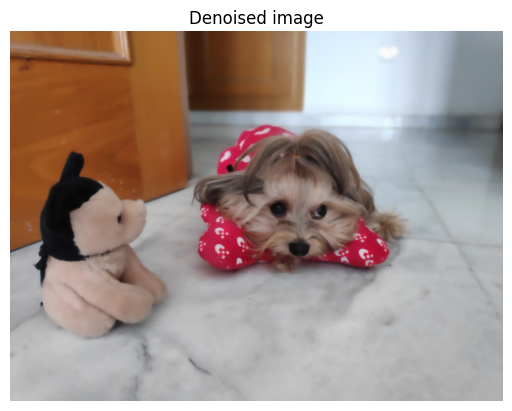

In [ ]:
# Import the module and function
from skimage.restoration import denoise_tv_chambolle

noisy_image = plt.imread("miny.jpeg")

# Apply total variation filter denoising
denoised_image = denoise_tv_chambolle(noisy_image, multichannel=True)

# Show the noisy and denoised images
show_image(noisy_image, 'Noisy')
show_image(denoised_image, 'Denoised image')

## Reducing noise while preserving edges

<ipython-input-9-5356a16f7ff4>:7: FutureWarning: `multichannel` is a deprecated argument name for `denoise_bilateral`. It will be removed in version 1.0. Please use `channel_axis` instead.
  denoised_image = denoise_bilateral(landscape_image,


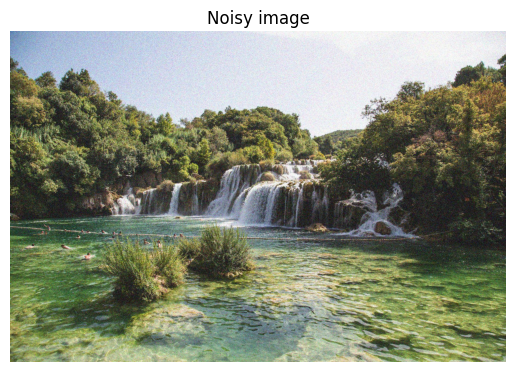

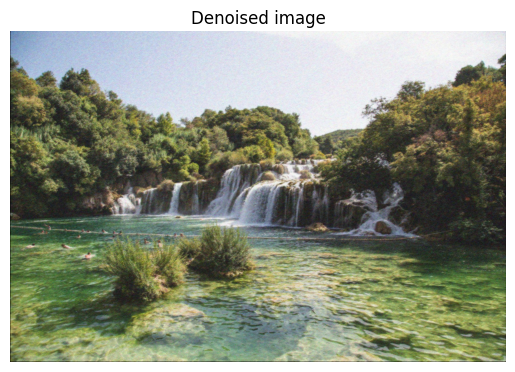

In [ ]:
# Import bilateral denoising function
from skimage.restoration import denoise_bilateral

landscape_image = plt.imread("noise-noisy-nature.jpg")

# Apply bilateral filter denoising
denoised_image = denoise_bilateral(landscape_image,
                                   multichannel=True)

# Show original and resulting images
show_image(landscape_image, 'Noisy image')
show_image(denoised_image, 'Denoised image')

# **3.Supper pixels segmentation**(phân đoạn hình ảnh)

In [ ]:
from PIL import Image

def calculate_pixels(image_path):
    try:
        image = Image.open(image_path)
        width, height = image.size
        return width * height
    except Exception as e:
        print("Lỗi:", e)
        return None

image_path = "chinese.jpg"  # Thay đổi đường dẫn đến hình ảnh thích hợp
total_pixels = calculate_pixels(image_path)

if total_pixels is not None:
    print("Tổng số pixel trong hình ảnh:", total_pixels)

Tổng số pixel trong hình ảnh: 50615


**Phân đoạn hình ảnh bằng thuật toán kmeans**

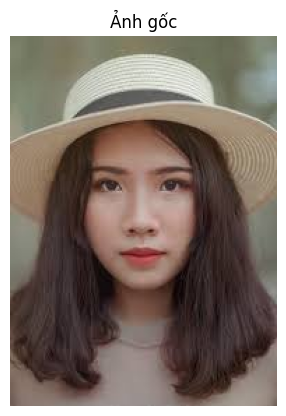

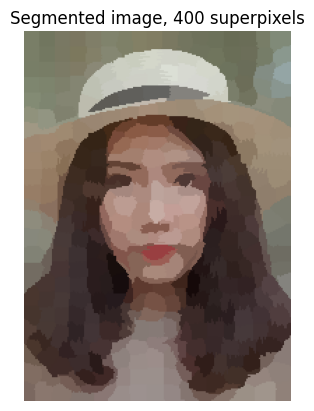

In [ ]:
# Import the slic function from segmentation module
from skimage.segmentation import slic

# Import the label2rgb function from color module
from skimage.color import label2rgb
face_image = plt.imread("chinese.jpg")
# Obtain the segmentation with 400 regions
segments = slic(face_image, n_segments= 400)

# Put segments on top of original image to compare
segmented_image = label2rgb(segments, face_image, kind='avg')

# Show the segmented image
show_image(face_image, "Ảnh gốc")
show_image(segmented_image, "Segmented image, 400 superpixels")

# **4. Finding Contours**

1. Tạo hình bao cho vật thể có hình dạng cụ thể(con ngựa)


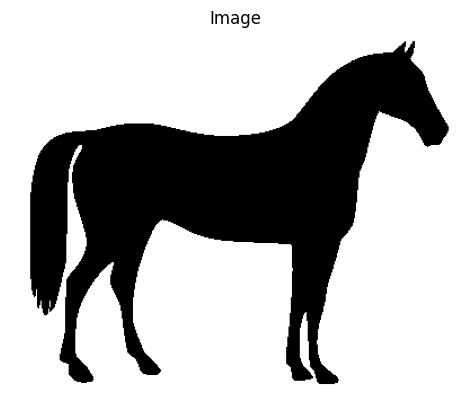

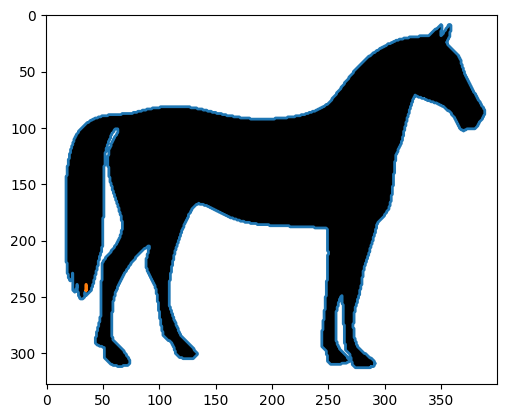

In [ ]:
# Import the modules
from skimage import measure, data

# Obtain the horse image
horse_image = data.horse()

# Find the contours with a constant level value of 0.8
contours = measure.find_contours(horse_image, 0.8)

def show_image_contour(image, contours):
    plt.figure()
    plt.imshow(image, interpolation='nearest', cmap='gray')
    for contour in contours:
        plt.plot(contour[:, 1], contour[:, 0], linewidth=2)
    plt.show()

show_image(horse_image)
# Shows the image with contours found
show_image_contour(horse_image, contours)

tìm đường bao trong hình ảnh con xúc sắc

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


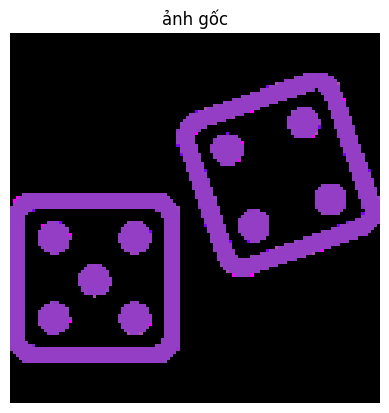

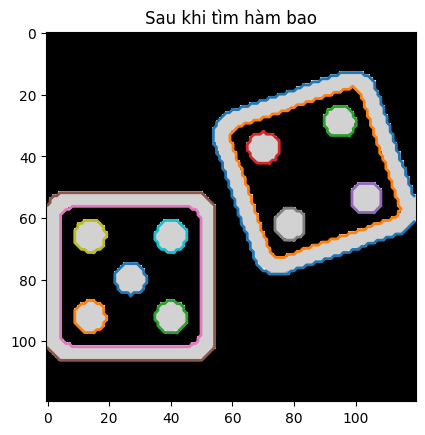

In [ ]:
import matplotlib.pyplot as plt
from skimage import color, filters, measure
from skimage.io import imread

# Function to show image with contours
def show_image_contour(image, contours):
    plt.figure()
    plt.title("Sau khi tìm hàm bao")
    plt.imshow(image, cmap='gray')
    for contour in contours:
        plt.plot(contour[:, 1], contour[:, 0], linewidth=2)
    plt.show()

# Load the image
image_dice = imread("dices.png")

# Remove the alpha channel if it exists
if image_dice.shape[2] == 4:
    image_dice = image_dice[:, :, :3]

# Convert the image to grayscale
image_dice_gray = color.rgb2gray(image_dice)

# Obtain the optimal thresh value
thresh = filters.threshold_otsu(image_dice_gray)

# Apply thresholding
binary = image_dice_gray > thresh

# Find contours at a constant value of 0.8
contours = measure.find_contours(binary, 0.8)

show_image(image_dice, "ảnh gốc")
# Show the image with contours
show_image_contour(image_dice_gray, contours)


# Count the dots in a dice's image
Now we have found the contours, we can extract information from it.

In the previous exercise, we prepared a purple dices image to find its contours:

3 images showing the steps to find contours

This time we'll determine what number was rolled for the dice, by counting the dots in the image.

The contours found in the previous exercise are preloaded as contours.

Create a list with all contour's shapes as shape_contours. You can see all the contours shapes by calling shape_contours in the console, once you have created it.

Check that most of the contours aren't bigger in size than 50. If you count them, they are the exact number of dots in the image.



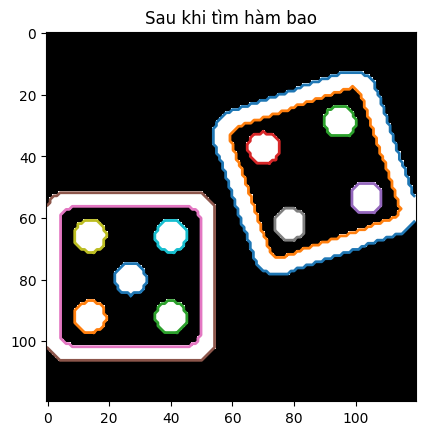

Dice's dots number: 9. 


In [ ]:
# Create list with the shape of each contour
shape_contours = [cnt.shape[0] for cnt in contours]

# Set 50 as the maximum size of the dots shape
max_dots_shape = 50

# Count dots in contours excluding bigger than dots size
dots_contours = [cnt for cnt in contours if np.shape(cnt)[0] < max_dots_shape]

# Shows all contours found
show_image_contour(binary, contours)

# Print the dice's number
print("Dice's dots number: {}. ".format(len(dots_contours)))